# Working with multiple files

In [32]:
library(tidyverse)
library(stringr)

## Extended example

Suppose we have the following scenario:

A multi-center experiment is conducted at Duke and UNC.

- Duke has patients `Ann`, `Bob`, `Charle`
- UNC has patients `David`, `Ed`, `Fiona`
- Each patient has blood sampled at 2 time points 
- The genomics core at each center measures 3 genes for each patient at each time point
- The proteomics core at each center measures 3 proteins from each patient at each time point
- Each center has additional information about patient demographics in a different database

We have a ten files to work with:

```
duke_demographics.tsv
duke_genes_v1.tsv
duke_genes_v2.tsv
duke_proteins_v1.tsv
duke_proteins_v2.tsv
unc_demographics.tsv
unc_genes_v1.tsv
unc_genes_v2.tsv
unc_proteins_v1.tsv
unc_proteins_v2.tsv
```

## Objective

We want to visualize the correlation between the gene and protein expression changes from visit 1 to visit 2 for all patients in the study. We also want to augment the data with demographic variables for each patient.

- Assume that labs within an institution *do not* have batch effects across visits
- Assume that labs at different institutions *have* batch affects and must be normalized before comparison

### Combine gene expression data from Duke and normalize to zero mean and unit standard deviation 

In [68]:
df_dg1 <- read_tsv('data/duke_genes_v1.tsv')
df_dg2 <- read_tsv('data/duke_genes_v2.tsv')

Parsed with column specification:
cols(
  pet = col_character(),
  gene_A = col_double(),
  gene_B = col_double(),
  gene_C = col_double()
)
Parsed with column specification:
cols(
  pet = col_character(),
  gene_A = col_double(),
  gene_B = col_double(),
  gene_C = col_double()
)


In [69]:
df_dg1

pet,gene_A,gene_B,gene_C
Ann,91.09792,64.62166,124.4608
Bob,88.81115,78.24940,113.6644
Charlie,107.52933,70.52984,124.5951


In [70]:
df_dg2

pet,gene_A,gene_B,gene_C
Ann,108.67919,90.38630,137.5395
Bob,113.44700,101.52725,144.7763
Charlie,98.12047,97.70863,131.1964


In [71]:
df_dg <- bind_rows(df_dg1, df_dg2, .id = "visit")
df_dg

visit,pet,gene_A,gene_B,gene_C
1,Ann,91.09792,64.62166,124.4608
1,Bob,88.81115,78.24940,113.6644
1,Charlie,107.52933,70.52984,124.5951
2,Ann,108.67919,90.38630,137.5395
2,Bob,113.44700,101.52725,144.7763
2,Charlie,98.12047,97.70863,131.1964


In [72]:
df_dg.scaled <- df_dg  %>% mutate_if(is.numeric, scale)
df_dg.scaled

visit,pet,gene_A,gene_B,gene_C
1,Ann,-1.0073042,-1.2805845,-0.4479685
1,Bob,-1.2335142,-0.3723877,-1.4327190
1,Charlie,0.6181059,-0.8868438,-0.4357137
2,Ann,0.7318518,0.4364545,0.7449587
2,Bob,1.2034879,1.1789234,1.4050414
2,Charlie,-0.3126272,0.9244382,0.1664011


### Do the same for the other data sets

Duke protein expression

In [73]:
df_dp1 <- read_tsv('data/duke_proteins_v1.tsv')
df_dp2 <- read_tsv('data/duke_proteins_v2.tsv')
df_dp <- bind_rows(df_dp1, df_dp2, .id = "visit")
df_dp.scaled <- df_dp %>%  mutate_if(is.numeric, scale)

Parsed with column specification:
cols(
  pet = col_character(),
  prot_A = col_double(),
  prot_B = col_double(),
  prot_C = col_double()
)
Parsed with column specification:
cols(
  pet = col_character(),
  prot_A = col_double(),
  prot_B = col_double(),
  prot_C = col_double()
)


In [74]:
head(df_dp.scaled)

visit,pet,prot_A,prot_B,prot_C
1,Ann,-0.4967020,0.9830005,-1.37774584
1,Bob,-1.0132844,-1.1799912,-1.01496776
1,Charlie,-0.3455620,-0.8561590,0.60497113
2,Ann,-0.4191436,0.3772850,0.88392265
2,Bob,1.7870904,-0.5388750,-0.05597907
2,Charlie,0.4876017,1.2147397,0.95979888


UNC gene expression

In [75]:
df_ug1 <- read_tsv('data/unc_genes_v1.tsv')
df_ug2 <- read_tsv('data/unc_genes_v2.tsv')
df_ug <- bind_rows(df_ug1, df_ug2, .id = "visit")
df_ug.scaled <- df_ug %>%  mutate_if(is.numeric, scale)

Parsed with column specification:
cols(
  pet = col_character(),
  gene_A = col_double(),
  gene_B = col_double(),
  gene_C = col_double()
)
Parsed with column specification:
cols(
  pet = col_character(),
  gene_A = col_double(),
  gene_B = col_double(),
  gene_C = col_double()
)


In [76]:
head(df_ug.scaled)

visit,pet,gene_A,gene_B,gene_C
1,David,-0.59425311,-1.2262407,-0.30771429
1,Ed,-1.17645232,-0.5087640,0.02835355
1,Fiona,0.36658576,-0.3217073,-1.82700451
2,David,0.08382534,0.5735718,0.66994801
2,Ed,-0.40047124,-0.1817827,0.92567540
2,Fiona,1.72076557,1.6649228,0.51074184


UNC protein expression

In [77]:
df_up1 <- read_tsv('data/unc_proteins_v1.tsv')
df_up2 <- read_tsv('data/unc_proteins_v2.tsv')
df_up <- bind_rows(df_up1, df_up2, .id = "visit")
df_up.scaled <- df_up %>%  mutate_if(is.numeric, scale)

Parsed with column specification:
cols(
  pet = col_character(),
  prot_A = col_double(),
  prot_B = col_double(),
  prot_C = col_double()
)
Parsed with column specification:
cols(
  pet = col_character(),
  prot_A = col_double(),
  prot_B = col_double(),
  prot_C = col_double()
)


In [78]:
head(df_up.scaled)

visit,pet,prot_A,prot_B,prot_C
1,David,1.04580136,0.1280673,-0.6867668
1,Ed,-1.65977553,0.2117860,0.9772767
1,Fiona,0.05811210,-0.6413509,-1.4593511
2,David,-0.44575884,-0.7384114,0.9175770
2,Ed,0.02765904,1.8317201,0.6595148
2,Fiona,0.97396187,-0.7918110,-0.4082508


### Find the change in each gene from visit 1 to visit 2

In [79]:
df_dg.scaled

visit,pet,gene_A,gene_B,gene_C
1,Ann,-1.0073042,-1.2805845,-0.4479685
1,Bob,-1.2335142,-0.3723877,-1.4327190
1,Charlie,0.6181059,-0.8868438,-0.4357137
2,Ann,0.7318518,0.4364545,0.7449587
2,Bob,1.2034879,1.1789234,1.4050414
2,Charlie,-0.3126272,0.9244382,0.1664011


In [80]:
# To avoid a bunch or harmless warnigns, we will temprarily suppress them

options(warn=-1)

In [81]:
df_dg.scaled %>% 
gather(gene, value, starts_with('gene'))  %>% 
head

visit,pet,gene,value
1,Ann,gene_A,-1.0073042
1,Bob,gene_A,-1.2335142
1,Charlie,gene_A,0.6181059
2,Ann,gene_A,0.7318518
2,Bob,gene_A,1.2034879
2,Charlie,gene_A,-0.3126272


In [82]:
df_dg.scaled %>% 
gather(gene, value, starts_with('gene'))  %>% 
spread(visit, value) %>%
head

pet,gene,1,2
Ann,gene_A,-1.0073042,0.7318518
Ann,gene_B,-1.2805845,0.4364545
Ann,gene_C,-0.4479685,0.7449587
Bob,gene_A,-1.2335142,1.2034879
Bob,gene_B,-0.3723877,1.1789234
Bob,gene_C,-1.4327190,1.4050414


In [83]:
df_dg.diff <- df_dg.scaled %>% 
gather(gene, value, starts_with('gene'))  %>% 
spread(visit, value) %>%
transmute(patient=pet, 
          gene=str_extract(gene, '[^_]+$'), 
          gene.change=`2`-`1`)
head(df_dg.diff)

patient,gene,gene.change
Ann,A,1.739156
Ann,B,1.717039
Ann,C,1.192927
Bob,A,2.437002
Bob,B,1.551311
Bob,C,2.837760


### Combine with UNC data

In [84]:
df_ug.diff <- df_ug.scaled %>% 
gather(gene, value, starts_with('gene'))  %>% 
spread(visit, value) %>%
transmute(patient=pet, 
          gene=str_extract(gene, '[^_]+$'), 
          gene.change=`2`-`1`)
head(df_ug.diff)

patient,gene,gene.change
David,A,0.6780785
David,B,1.7998124
David,C,0.9776623
Ed,A,0.7759811
Ed,B,0.3269814
Ed,C,0.8973218


In [85]:
df_g <- bind_rows(list(duke=df_dg.diff, unc=df_ug.diff), .id='site')
df_g

site,patient,gene,gene.change
duke,Ann,A,1.7391560
duke,Ann,B,1.7170389
duke,Ann,C,1.1929272
duke,Bob,A,2.4370022
duke,Bob,B,1.5513112
duke,Bob,C,2.8377604
duke,Charlie,A,-0.9307330
duke,Charlie,B,1.8112820
duke,Charlie,C,0.6021148
unc,David,A,0.6780785


### Now do the same with protein data

In [86]:
df_dp.diff <- df_dp.scaled %>% 
gather(protein, value, starts_with('prot'))  %>% 
spread(visit, value) %>%
transmute(patient=pet, 
          protein=str_extract(protein, '[^_]+$'), 
          protein.change=`2`-`1`)
head(df_dp.diff)

patient,protein,protein.change
Ann,A,0.07755833
Ann,B,-0.60571547
Ann,C,2.26166848
Bob,A,2.80037479
Bob,B,0.64111624
Bob,C,0.95898869


In [87]:
df_up.diff <- df_up.scaled %>% 
gather(protein, value, starts_with('prot'))  %>% 
spread(visit, value) %>%
transmute(patient=pet, 
          protein=str_extract(protein, '[^_]+$'), 
          protein.change=`2`-`1`)
head(df_up.diff)

patient,protein,protein.change
David,A,-1.4915602
David,B,-0.8664787
David,C,1.6043438
Ed,A,1.6874346
Ed,B,1.6199340
Ed,C,-0.3177619


In [88]:
df_p <- bind_rows(list(duke=df_dp.diff, unc=df_up.diff), .id='site')
df_p

site,patient,protein,protein.change
duke,Ann,A,0.07755833
duke,Ann,B,-0.60571547
duke,Ann,C,2.26166848
duke,Bob,A,2.80037479
duke,Bob,B,0.64111624
duke,Bob,C,0.95898869
duke,Charlie,A,0.83316369
duke,Charlie,B,2.07089865
duke,Charlie,C,0.35482775
unc,David,A,-1.49156020


### Combine gene and protein data into single data frame

Since the rows are perfectly aligned, we can just bind columns together. If we are not certain that the rows match up exactly, it is safer to use a `join` to combine columns.

In [89]:
bind_cols(df_g, df_p, )

site,patient,gene,gene.change,site1,patient1,protein,protein.change
duke,Ann,A,1.7391560,duke,Ann,A,0.07755833
duke,Ann,B,1.7170389,duke,Ann,B,-0.60571547
duke,Ann,C,1.1929272,duke,Ann,C,2.26166848
duke,Bob,A,2.4370022,duke,Bob,A,2.80037479
duke,Bob,B,1.5513112,duke,Bob,B,0.64111624
duke,Bob,C,2.8377604,duke,Bob,C,0.95898869
duke,Charlie,A,-0.9307330,duke,Charlie,A,0.83316369
duke,Charlie,B,1.8112820,duke,Charlie,B,2.07089865
duke,Charlie,C,0.6021148,duke,Charlie,C,0.35482775
unc,David,A,0.6780785,unc,David,A,-1.49156020


In [90]:
df_gp <- bind_cols(df_g, df_p %>% select(-site, -patient, -protein))
head(df_gp)

site,patient,gene,gene.change,protein.change
duke,Ann,A,1.739156,0.07755833
duke,Ann,B,1.717039,-0.60571547
duke,Ann,C,1.192927,2.26166848
duke,Bob,A,2.437002,2.80037479
duke,Bob,B,1.551311,0.64111624
duke,Bob,C,2.837760,0.95898869


### Combine with demographic data

In [91]:
df_dd <- read_tsv('data/duke_demographics.tsv')
df_ud <- read_tsv('data/unc_demographics.tsv')

Parsed with column specification:
cols(
  patients = col_character(),
  age = col_integer(),
  sex = col_character()
)
Parsed with column specification:
cols(
  patients = col_character(),
  age = col_integer(),
  sex = col_character()
)


In [92]:
head(df_dd)

patients,age,sex
Ann,16,F
Bob,23,M
Beth,43,F
Charlie,53,M


In [93]:
head(df_ud)

patients,age,sex
David,49,K
Edward,53,M
Fiona,67,F


In [94]:
df_d <- bind_rows(list(duke=df_dd, unc=df_ud), .id='site')
df_d

site,patients,age,sex
duke,Ann,16,F
duke,Bob,23,M
duke,Beth,43,F
duke,Charlie,53,M
unc,David,49,K
unc,Edward,53,M
unc,Fiona,67,F


In [61]:
left_join(df_gp, df_d, by = c('site', c('patient'='patients')))

site,patient,gene,gene.change,protein.change,age,sex
duke,Ann,A,1.7391560,0.07755833,16,F
duke,Ann,B,1.7170389,-0.60571547,16,F
duke,Ann,C,1.1929272,2.26166848,16,F
duke,Bob,A,2.4370022,2.80037479,23,M
duke,Bob,B,1.5513112,0.64111624,23,M
duke,Bob,C,2.8377604,0.95898869,23,M
duke,Charlie,A,-0.9307330,0.83316369,53,M
duke,Charlie,B,1.8112820,2.07089865,53,M
duke,Charlie,C,0.6021148,0.35482775,53,M
unc,David,A,0.6780785,-1.49156020,49,K


There are missing values for Ed because the names don't match. We know that Ed's name in this case is really Edward, so we fix and try again.

In [95]:
left_join(df_gp %>% mutate(patient=recode(patient, 'Ed'='Edward')),
          df_d, 
          by = c('site', c('patient'='patients')))

site,patient,gene,gene.change,protein.change,age,sex
duke,Ann,A,1.7391560,0.07755833,16,F
duke,Ann,B,1.7170389,-0.60571547,16,F
duke,Ann,C,1.1929272,2.26166848,16,F
duke,Bob,A,2.4370022,2.80037479,23,M
duke,Bob,B,1.5513112,0.64111624,23,M
duke,Bob,C,2.8377604,0.95898869,23,M
duke,Charlie,A,-0.9307330,0.83316369,53,M
duke,Charlie,B,1.8112820,2.07089865,53,M
duke,Charlie,C,0.6021148,0.35482775,53,M
unc,David,A,0.6780785,-1.49156020,49,K


In [96]:
df_all <- left_join(df_gp %>% mutate(patient=recode(patient, 'Ed'='Edward')),
          df_d, 
          by = c('site', c('patient'='patients')))

In [97]:
head(df_all)

site,patient,gene,gene.change,protein.change,age,sex
duke,Ann,A,1.739156,0.07755833,16,F
duke,Ann,B,1.717039,-0.60571547,16,F
duke,Ann,C,1.192927,2.26166848,16,F
duke,Bob,A,2.437002,2.80037479,23,M
duke,Bob,B,1.551311,0.64111624,23,M
duke,Bob,C,2.837760,0.95898869,23,M


In [98]:
options(repr.plot.width=8, repr.plot.height=3)

Plotting the data suggests that there may be an increase in most genes and proteins from visit 1 to visit 2 (since most of the changes are positive), but there is no obvious correlation between the gene and its protein product.

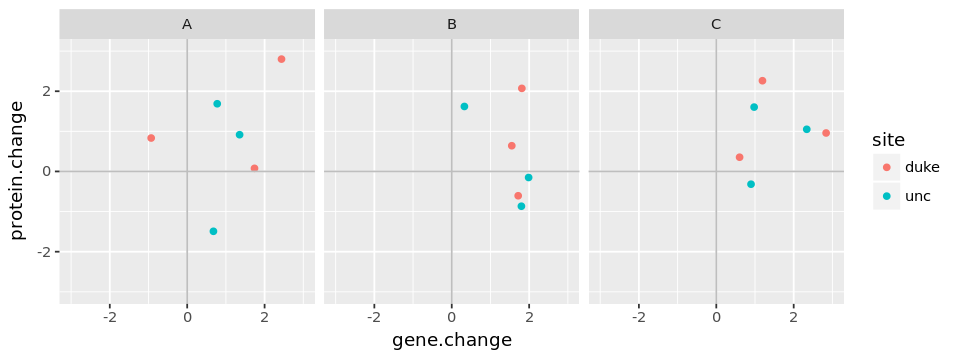

In [99]:
ggplot(df_all, aes(x=gene.change, y=protein.change, color=site)) + 
geom_point() + 
geom_hline(yintercept = 0, color='grey') + 
geom_vline(xintercept = 0, color='grey') +
xlim(c(-3, 3)) +
ylim(c(-3, 3)) +
facet_grid(~ gene)